In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras

# Part 1 Binary classification problem

Two-class classification, or binary classification, may be the most widely applied kind of machine learning problem. The aim of this lab is to classify movie reviews into “positive” reviews and “negative” reviews, just based on the text content of the reviews.

## Load the IMDB dataset

We'll be working with the “IMDB dataset”, a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. **It has already been preprocessed**: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print("Number of training examples:", train_data.shape)
print("Number of testing examples:", test_data.shape)

print("Number of train labels:", train_labels.shape)
print("Number of test labels:", test_labels.shape)

Number of training examples: (25000,)
Number of testing examples: (25000,)
Number of train labels: (25000,)
Number of test labels: (25000,)


In [3]:
train_data.shape

(25000,)

## Preparing the data

 We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

  1. We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as the first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later in the book).
  2. We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as the first layer in our network a Dense layer, capable of handling floating-point vector data.


In [4]:
# second solution
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

I propose the following architecture choice:

  * Two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review.
  * The intermediate layers will use relu as their “activation function”, and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”, i.e. how likely the review is to be positive).
  * A relu (rectified linear unit) is a function meant to zero-out negative values, while a sigmoid “squashes” arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.


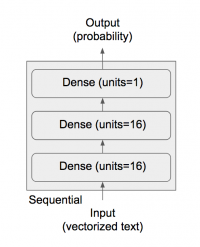

In [5]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

## Network training configuration

 Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the binary_crossentropy loss. It isn't the only viable choice: you could use, for instance, mean_squared_error. But crossentropy is usually the best choice when you are dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory, that measures the “distance” between probability distributions, or in our case, between the ground-truth distribution and our predictions.

To configure the model please use the following parameters:

* rmsprop optimizer
* binary_crossentropy loss function
* accuracy metric


In [6]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

## Data preparation

Data is already prepared?

In [7]:
# DONE

## Validation

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a “validation set” by setting apart 10,000 samples from the original data (suggested split: 25000 train, 10000 validation, 15000 test). You can do it manually or use train_test_split from sklearn library:

In [8]:
from sklearn import model_selection
X_test, X_val, Y_test, Y_val = model_selection.train_test_split(x_test, y_test, test_size=0.4)

X_train = x_train
Y_train = y_train

print("X_test shape = ", X_test.shape)
print("X_val shape = ", X_val.shape)

print("X_val shape = ", X_val.shape)
print("Y_val shape = ", Y_val.shape)

X_test shape =  (15000, 10000)
X_val shape =  (10000, 10000)
X_val shape =  (10000, 10000)
Y_val shape =  (10000,)


## Model fit

In [9]:
history = network.fit(
      x=X_train,
      y=Y_train,
      batch_size=512,
      epochs=20,
      validation_data=(X_val, Y_val)
  )

Epoch 1/20
49/49 [==============================] - 2s 19ms/step - loss: 0.4611 - accuracy: 0.8108 - val_loss: 0.3416 - val_accuracy: 0.8761
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2733 - accuracy: 0.9024 - val_loss: 0.2829 - val_accuracy: 0.8889
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2143 - accuracy: 0.9228 - val_loss: 0.2964 - val_accuracy: 0.8793
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1805 - accuracy: 0.9355 - val_loss: 0.2894 - val_accuracy: 0.8843
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1619 - accuracy: 0.9425 - val_loss: 0.3105 - val_accuracy: 0.8765
Epoch 6/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1458 - accuracy: 0.9495 - val_loss: 0.3134 - val_accuracy: 0.8780
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1325 - accuracy: 0.9531 - val_loss: 0.3223 - val_accuracy: 0.8771
Epoch 8/20
49

## Training history

The history = model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it.

It contains 4 entries: one per metric that was being monitored, during training and during validation. Please use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy.

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

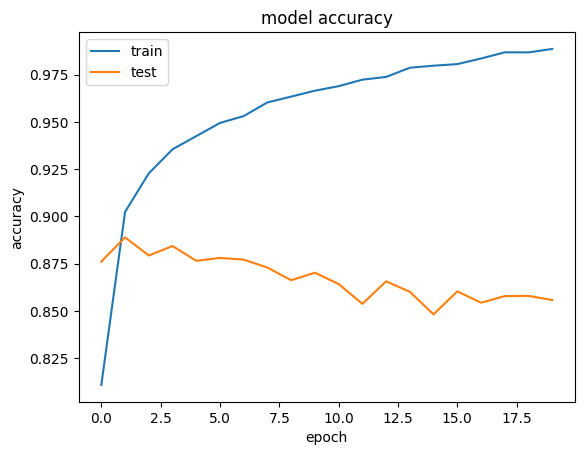

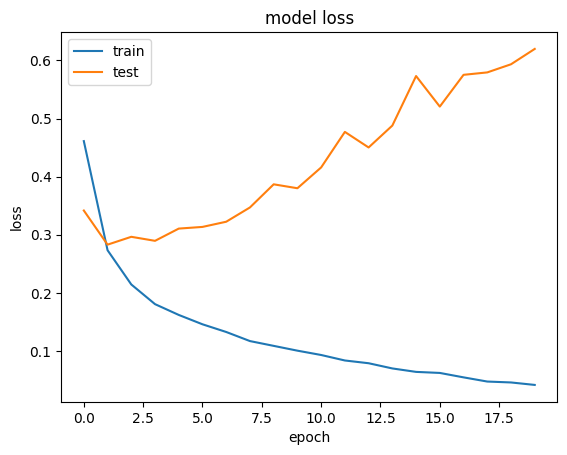

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. In precise terms, what you are seeing is “overfitting”: after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

Please check how that model performs on the test set too!!

In [12]:
test_loss, test_acc = network.evaluate(X_test, Y_test)
val_loss, val_acc = network.evaluate(X_test, Y_test)

print('test_acc:', test_acc)
print('test_acc:', val_acc)

469/469 [==============================] - 1s 1ms/step - loss: 0.6368 - accuracy: 0.8522
test_acc: 0.8521999716758728
test_acc: 0.8521999716758728


# Part 2 Hyperparameters



As we stated before, there is no ideal solution to each deep learning task. To decide how many layers to add or which activation functions use you need practice and usually a lot of trials and errors. Some people even say that implementing a neural network from scratch is more art than science.

</br>

**Parameter optimisation**

Even then, after you decide what your model will look like, there is a matter of training, which also requires additional parameters. These numbers, that you already encountered, like a number of epochs, learning rate or optimizer are called hyperparameters. Training a neural network is basically an optimization problem, so you can think of setting those parameters as optimizing an optimization. It's not an easy task. There are, however, some tools that can help with that.

</br>

**Callbacks**

One of the simplest methods helpful in parameter selection is using Callbacks. These are basic functions that let you act on the model during training. They allow you to interrupt training to save a model, load a different weight set, or otherwise alter the state of the model. Here are some examples of ways you can use callbacks:

* Model checkpointing—saving the current weights of the model at different points during training.
* Early stopping—interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
* Dynamically adjusting the value of certain parameters during training — such as the learning rate of the optimizer.
* Logging training and validation metrics during training, or visualizing the representations learned by the model as they’re updated.

There are many default methods that you can explore in keras.callbacks such as ModelCheckpoint, EarlyStopping or LearningRateScheduler. However, one of the most useful things is that you can define your own callback and pass it to the model. So first, check if the desired functionality is available in Keras and if it isn't write it yourself.

To do so, you can use functions that trigger when certain action occurs:

* on_epoch_begin
* on_epoch_end
* on_batch_begin
* on_batch_end
* on_train_begin
* on_train_end

You can define function behavior after the trigger. In an example below, we check after each epoch if the training accuracy reaches a certain threshold (in this case 60%). If it does, we stop training. This is a useful method to decide on a number of epochs and avoid overfitting. You can read more about callbacks in Keras Callbacks Documentation.

## Define a callback class

In [13]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

Then create a callback instance and pass it as an argument when using .fit():

In [14]:
callbacks = myCallback()

network = models.Sequential()
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history2 = network.fit(
      x=X_train,
      y=Y_train,
      # batch_size=512,
      epochs=10,
      # validation_data=(X_val, Y_val),
      callbacks=[callbacks]
  )

Epoch 1/10
782/782 [==============================] - 2s 2ms/step - loss: 0.3338 - accuracy: 0.8654
Epoch 2/10
768/782 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9177
Reached 90% accuracy so cancelling training!
782/782 [==============================] - 2s 2ms/step - loss: 0.2135 - accuracy: 0.9175


Your task is to use it on a mnist classification (lab 1) or imdb (lab 2). You can change parameters or callback behaviour as you wish, as long as it succeeds to stop training earlier.

## Optimisation algorithms from sklearn

 There are various algorithms that automatically set different parameters, run training, and repeat the process. For example, the Scikit-Learn library provides Grid Search Method (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or Random Search Method (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). You can read more about them in the documentation. More sophisticated methods, like genetic algorithms or particle swarm optimization, are sometimes used too.

Your last task this week is to use Grid Search Optimisation algorithm to optimise one of the networks from previous weeks. Choose two parameters (**for example number of epochs and batch size**) and try two different values for each parameter. Grid Search method will therefore create a mesh of these parameters, with four elements (2×2). This process will take more time and computation power, as it will basically train the model four times and compare results. If you don't have a good computer it is best to try it on simple mnist or imdb classification.

In [17]:
from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier # alternatively

def create_model():
    network = models.Sequential()

    network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(16, activation='relu'))
    network.add(layers.Dense(1, activation='sigmoid'))

    network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    return network

model = KerasClassifier(build_fn=create_model)

par1_batch = [32, 64]
par2_epoch = [3, 5]

param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv = 3
                    )

grid_results = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
521/521 [==============================] - 2s 3ms/step - loss: 0.3409 - accuracy: 0.8613
Epoch 2/3
521/521 [==============================] - 1s 3ms/step - loss: 0.2019 - accuracy: 0.9216
Epoch 3/3
261/261 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
521/521 [==============================] - 2s 3ms/step - loss: 0.3409 - accuracy: 0.8613
Epoch 2/3
521/521 [==============================] - 2s 3ms/step - loss: 0.2035 - accuracy: 0.9246
Epoch 3/3
261/261 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
521/521 [==============================] - 2s 3ms/step - loss: 0.3452 - accuracy: 0.8604
Epoch 2/3
521/521 [==============================] - 2s 3ms/step - loss: 0.2077 - accuracy: 0.9213
Epoch 3/3
261/261 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
521/521 [==============================] - 2s 3ms/step - loss: 0.3491 - accuracy: 0.8571
Epoch 2/5
521/521 [==============================] - 2s 3ms/step - loss: 0.2060 - accuracy: 0.9203
Epoch 3/5
521/521 [==============================] - 2s 3ms/step - loss: 0.1608 - accuracy: 0.9405
Epoch 4/5
521/521 [==============================] - 2s 3ms/step - loss: 0.1323 - accuracy: 0.9508
Epoch 5/5
261/261 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
521/521 [==============================] - 2s 2ms/step - loss: 0.3409 - accuracy: 0.8620
Epoch 2/5
521/521 [==============================] - 1s 3ms/step - loss: 0.2040 - accuracy: 0.9234
Epoch 3/5
521/521 [==============================] - 1s 3ms/step - loss: 0.1601 - accuracy: 0.9419
Epoch 4/5
521/521 [==============================] - 1s 2ms/step - loss: 0.1297 - accuracy: 0.9550
Epoch 5/5
261/261 [==============================] - 0s 965us/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
521/521 [==============================] - 2s 3ms/step - loss: 0.3488 - accuracy: 0.8555
Epoch 2/5
521/521 [==============================] - 1s 3ms/step - loss: 0.2069 - accuracy: 0.9211
Epoch 3/5
521/521 [==============================] - 1s 2ms/step - loss: 0.1628 - accuracy: 0.9404
Epoch 4/5
521/521 [==============================] - 1s 2ms/step - loss: 0.1321 - accuracy: 0.9536
Epoch 5/5
261/261 [==============================] - 0s 931us/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
261/261 [==============================] - 1s 3ms/step - loss: 0.3846 - accuracy: 0.8411
Epoch 2/3
261/261 [==============================] - 1s 3ms/step - loss: 0.2090 - accuracy: 0.9204
Epoch 3/3
131/131 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
261/261 [==============================] - 1s 3ms/step - loss: 0.3551 - accuracy: 0.8526
Epoch 2/3
261/261 [==============================] - 1s 3ms/step - loss: 0.2020 - accuracy: 0.9241
Epoch 3/3
131/131 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
261/261 [==============================] - 1s 3ms/step - loss: 0.3712 - accuracy: 0.8471
Epoch 2/3
261/261 [==============================] - 1s 3ms/step - loss: 0.2073 - accuracy: 0.9195
Epoch 3/3
131/131 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
261/261 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 0.8541
Epoch 2/5
261/261 [==============================] - 1s 3ms/step - loss: 0.2061 - accuracy: 0.9206
Epoch 3/5
261/261 [==============================] - 1s 3ms/step - loss: 0.1557 - accuracy: 0.9416
Epoch 4/5
261/261 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.9577
Epoch 5/5
131/131 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
261/261 [==============================] - 1s 4ms/step - loss: 0.3529 - accuracy: 0.8583
Epoch 2/5
261/261 [==============================] - 1s 3ms/step - loss: 0.2030 - accuracy: 0.9247
Epoch 3/5
261/261 [==============================] - 1s 3ms/step - loss: 0.1543 - accuracy: 0.9439
Epoch 4/5
261/261 [==============================] - 1s 3ms/step - loss: 0.1213 - accuracy: 0.9577
Epoch 5/5
131/131 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
261/261 [==============================] - 1s 3ms/step - loss: 0.3842 - accuracy: 0.8467
Epoch 2/5
261/261 [==============================] - 1s 3ms/step - loss: 0.2096 - accuracy: 0.9220
Epoch 3/5
261/261 [==============================] - 1s 3ms/step - loss: 0.1600 - accuracy: 0.9419
Epoch 4/5
261/261 [==============================] - 1s 3ms/step - loss: 0.1273 - accuracy: 0.9541
Epoch 5/5
131/131 [==============================] - 0s 1ms/step


c:\Users\rafag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3215 - accuracy: 0.8697
Epoch 2/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2119 - accuracy: 0.9186
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1785 - accuracy: 0.9340
Best: 0.886240 using {'batch_size': 32, 'epochs': 3}


    Best: 0.886240 using {'batch_size': 32, 'epochs': 3}